In [4]:
import numpy as np
import pandas as pd
import os,time, matplotlib
import matplotlib.pyplot as plt
import datetime,time,json
import nltk

from newsplease import NewsPlease
from utils import GoogleNews

In [5]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rba/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
df = pd.read_pickle('../data/text_dataset/articles_v1.pickle')

# Some articles seems to not feature the key arguments...
# We can filter news not related to vaccination by title and text body, however this has a large impact
# On dataset size 18K -> 10K

df = df[df.title.str.contains('vaccin|corona|virus', regex=True)] # Seems some news are not related to vaccine..
df = df[df.maintext.str.contains('vaccin|corona|virus', regex=True)] # Seems some news are not related to vaccine..

df = df.reset_index(drop=True)
print('dataset shape', len(df))
df.head()

dataset shape 10563


,id,title,link,published,maintext,country,numchars,numwords
0,8f585a5d26a3b5820b5f7e1e3feec996,coronavirus - austria travel advice - gov.uk,https://www.gov.uk/foreign-travel-advice/austr...,"Sat, 21 Mar 2020 10:13:56 GMT",coronavirus travel health check the latest inf...,"[uk, ireland, austria]",4189,799
1,2ce54f3940c5e94a29387852d3f4b282,cdc study shows unvaccinated people are 29 tim...,https://www.cnbc.com/2021/08/24/cdc-study-show...,"Tue, 24 Aug 2021 07:00:00 GMT",medics transfer a patient on a stretcher from ...,[],2122,408
2,cdafae70c4e76a5cb4ac8de7fe64b314,here's how the last pandemic vaccine was rolle...,https://www.healthline.com/health-news/what-ha...,"Mon, 10 Aug 2020 07:00:00 GMT",share on pinterest families wait for the h1n1 ...,[],3952,786
3,187e2dff43d693610498830a9ee59a13,italy mandates covid vaccine for those over 50...,https://www.newsweek.com/italy-mandates-covid-...,"Thu, 06 Jan 2022 08:00:00 GMT",as the death toll from the covid-19 omicron va...,"[italy, greece, austria, germany]",2908,583
4,b65c939453403440b5318bfd3fcb70e0,reader question: do international school teach...,https://www.thelocal.it/20210816/reader-questi...,"Mon, 16 Aug 2021 07:00:00 GMT",question: i’ve been hired to teach at an inter...,"[italy, uk]",4813,964


In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()

results = [sia.polarity_scores(line) for line in df.maintext]

    
scores_df = pd.DataFrame.from_records(results)
# df2 = scores_df.join(raw_data, rsuffix="_right")


In [8]:
sia = SIA()

results_title = [sia.polarity_scores(line) for line in df.title]

    
scores_df_title = pd.DataFrame.from_records(results_title)
# df2 = scores_df.join(raw_data, rsuffix="_right")
scores_df_title.columns = [x+'_title' for x  in scores_df_title.columns]


In [9]:
df3 = scores_df.join(df, rsuffix="_right")
df3 = scores_df_title.join(df3, rsuffix="_right")

df3.head()

,neg_title,neu_title,pos_title,compound_title,neg,neu,pos,compound,id,title,link,published,maintext,country,numchars,numwords
0,0.000,1.000,0.0,0.0000,0.033,0.902,0.066,0.9769,8f585a5d26a3b5820b5f7e1e3feec996,coronavirus - austria travel advice - gov.uk,https://www.gov.uk/foreign-travel-advice/austr...,"Sat, 21 Mar 2020 10:13:56 GMT",coronavirus travel health check the latest inf...,"[uk, ireland, austria]",4189,799
1,0.000,1.000,0.0,0.0000,0.042,0.910,0.048,0.8227,2ce54f3940c5e94a29387852d3f4b282,cdc study shows unvaccinated people are 29 tim...,https://www.cnbc.com/2021/08/24/cdc-study-show...,"Tue, 24 Aug 2021 07:00:00 GMT",medics transfer a patient on a stretcher from ...,[],2122,408
2,0.000,1.000,0.0,0.0000,0.074,0.871,0.054,-0.9423,cdafae70c4e76a5cb4ac8de7fe64b314,here's how the last pandemic vaccine was rolle...,https://www.healthline.com/health-news/what-ha...,"Mon, 10 Aug 2020 07:00:00 GMT",share on pinterest families wait for the h1n1 ...,[],3952,786
3,0.206,0.794,0.0,-0.5994,0.051,0.910,0.039,-0.9274,187e2dff43d693610498830a9ee59a13,italy mandates covid vaccine for those over 50...,https://www.newsweek.com/italy-mandates-covid-...,"Thu, 06 Jan 2022 08:00:00 GMT",as the death toll from the covid-19 omicron va...,"[italy, greece, austria, germany]",2908,583
4,0.000,1.000,0.0,0.0000,0.021,0.932,0.047,0.9697,b65c939453403440b5318bfd3fcb70e0,reader question: do international school teach...,https://www.thelocal.it/20210816/reader-questi...,"Mon, 16 Aug 2021 07:00:00 GMT",question: i’ve been hired to teach at an inter...,"[italy, uk]",4813,964


In [10]:
df3.neg.max()

0.303

In [11]:
df3.loc[df3.neg.idxmax()].maintext

"france's president emanuel macron criticized protesters who believe they should be free to reject the covid-19 vaccines."

In [12]:
df3.loc[df3.neg.idxmax()].title

'see what macron said about anti-vaccine protesters - cnn'

In [13]:
df3.loc[df3.neg.idxmax()].link

'https://www.cnn.com/videos/health/2021/07/26/macron-france-covid-19-pass-bitterman-vpx-new.cnn'

In [14]:
# Add date info
df3 = df3.assign(date = pd.to_datetime(df3.published))

/home/rba/Projects/cultural-analytics/venv_culturalanalytics/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


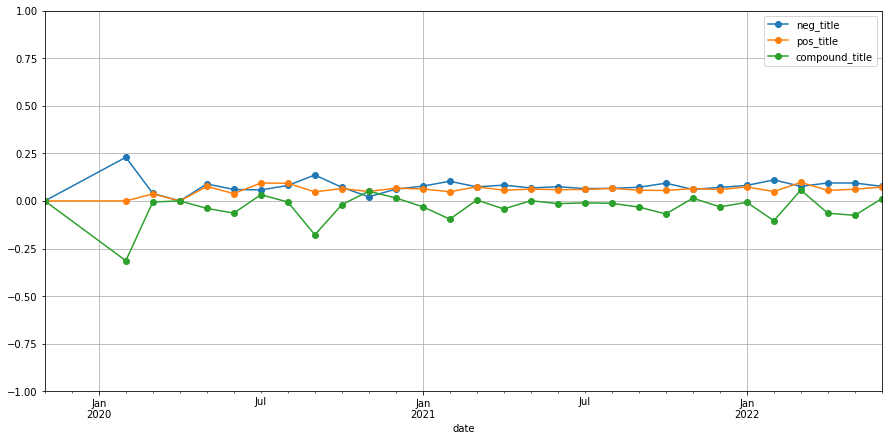

In [15]:
it = df3[df3.country.astype(str).str.contains('usa')]
fig,ax = plt.subplots(figsize=(15,7))

it.groupby(it.date.dt.to_period('M'))[['neg_title','pos_title','compound_title']].mean().plot(ax=ax, marker='o')
ax.set_ylim(-1,1)
ax.grid()

/home/rba/Projects/cultural-analytics/venv_culturalanalytics/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


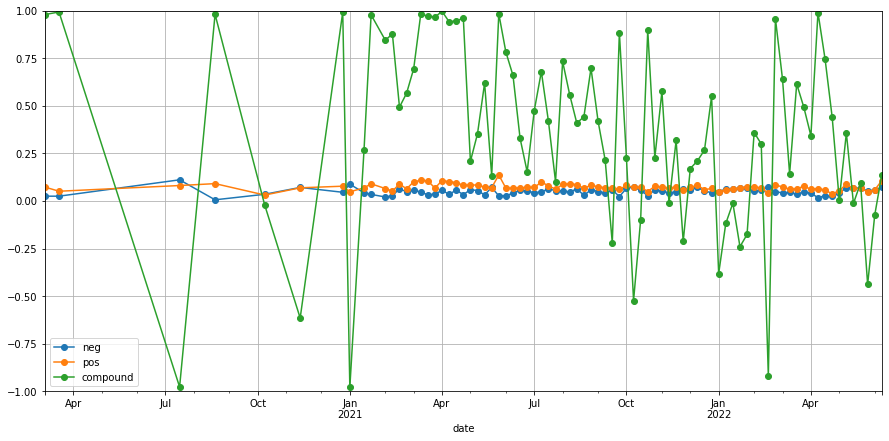

In [16]:
it = df3[df3.country.astype(str).str.contains('greece')]
fig,ax = plt.subplots(figsize=(15,7))

it.groupby(it.date.dt.to_period('W'))[['neg','pos','compound']].mean().plot(ax=ax, marker='o')
ax.set_ylim(-1,1)
ax.grid()

/home/rba/Projects/cultural-analytics/venv_culturalanalytics/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


Text(0, 0.5, 'No.Articles/W')

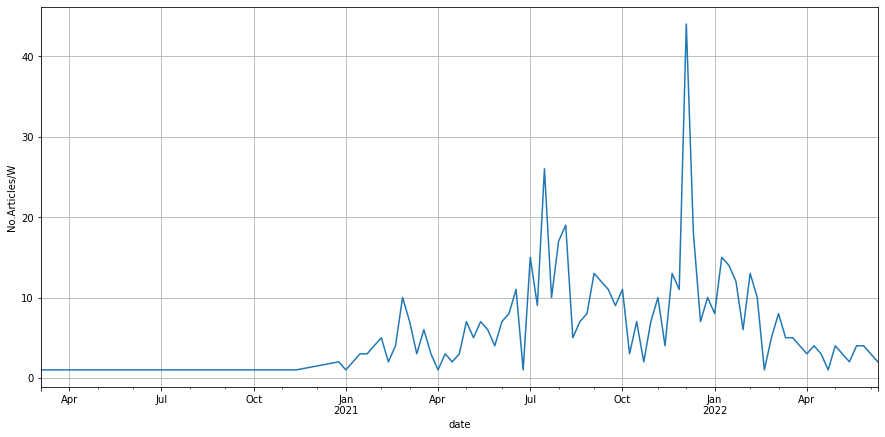

In [17]:
deltaT = 'W'
fig,ax = plt.subplots(figsize=(15,7))
it.groupby(it.date.dt.to_period(deltaT)).title.count().plot(ax=ax)
ax.grid()
ax.set_ylabel('No.Articles/{}'.format(deltaT))

In [18]:
df3.country.value_counts()

[]                                           4079
[usa]                                        1104
[uk]                                          857
[uk, usa]                                     252
[france]                                      224
                                             ... 
[poland, denmark, czech]                        1
[belgium, luxembourg, malta]                    1
[uk, romania, poland, denmark, lithuania]       1
[belgium, croatia, france, germany]             1
[uk, france, italy, germany, usa, greece]       1
Name: country, Length: 1465, dtype: int64

In [19]:
# Add keywords analysis

In [20]:
# kwords = ['compulsatory', 'mandatory','hesitancy']

# pat = '|'.join(kwords)

# words = df3.maintext.str.split('\s+', regex=True)
# match = df3.maintext.str.findall(pat)

# df3 = df3.assign(kwords = match.apply(lambda x: list(set(x))))

df3 = df3.assign(isMandatory = df3.maintext.str.contains('mandator'),
            isHesitancy = df3.maintext.str.contains('hesitan'),
           isCompulsatory = df3.maintext.str.contains('compuls')
          )
df3

,neg_title,neu_title,pos_title,compound_title,neg,neu,pos,compound,id,title,link,published,maintext,country,numchars,numwords,date,isMandatory,isHesitancy,isCompulsatory
0,0.000,1.000,0.000,0.0000,0.033,0.902,0.066,0.9769,8f585a5d26a3b5820b5f7e1e3feec996,coronavirus - austria travel advice - gov.uk,https://www.gov.uk/foreign-travel-advice/austr...,"Sat, 21 Mar 2020 10:13:56 GMT",coronavirus travel health check the latest inf...,"[uk, ireland, austria]",4189,799,2020-03-21 10:13:56+00:00,False,False,True
1,0.000,1.000,0.000,0.0000,0.042,0.910,0.048,0.8227,2ce54f3940c5e94a29387852d3f4b282,cdc study shows unvaccinated people are 29 tim...,https://www.cnbc.com/2021/08/24/cdc-study-show...,"Tue, 24 Aug 2021 07:00:00 GMT",medics transfer a patient on a stretcher from ...,[],2122,408,2021-08-24 07:00:00+00:00,False,False,False
2,0.000,1.000,0.000,0.0000,0.074,0.871,0.054,-0.9423,cdafae70c4e76a5cb4ac8de7fe64b314,here's how the last pandemic vaccine was rolle...,https://www.healthline.com/health-news/what-ha...,"Mon, 10 Aug 2020 07:00:00 GMT",share on pinterest families wait for the h1n1 ...,[],3952,786,2020-08-10 07:00:00+00:00,False,False,False
3,0.206,0.794,0.000,-0.5994,0.051,0.910,0.039,-0.9274,187e2dff43d693610498830a9ee59a13,italy mandates covid vaccine for those over 50...,https://www.newsweek.com/italy-mandates-covid-...,"Thu, 06 Jan 2022 08:00:00 GMT",as the death toll from the covid-19 omicron va...,"[italy, greece, austria, germany]",2908,583,2022-01-06 08:00:00+00:00,True,False,True
4,0.000,1.000,0.000,0.0000,0.021,0.932,0.047,0.9697,b65c939453403440b5318bfd3fcb70e0,reader question: do international school teach...,https://www.thelocal.it/20210816/reader-questi...,"Mon, 16 Aug 2021 07:00:00 GMT",question: i’ve been hired to teach at an inter...,"[italy, uk]",4813,964,2021-08-16 07:00:00+00:00,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10558,0.162,0.838,0.000,-0.4019,0.094,0.814,0.093,0.4404,a64852eaeb8a1438795f4fe4aafb4632,"in france and germany, those who reject vaccin...",https://www.washingtonpost.com/world/europe/va...,"Sat, 17 Jul 2021 07:00:00 GMT",placeholder while article actions load paris —...,"[uk, france, italy, germany, usa, greece]",7663,1439,2021-07-17 07:00:00+00:00,True,False,True
10559,0.000,1.000,0.000,0.0000,0.055,0.907,0.038,-0.3229,9779da6baeec43b1f2707268c2051ddb,coronavirus briefing: what happened today - th...,https://www.nytimes.com/2021/09/09/us/coronavi...,"Thu, 09 Sep 2021 07:00:00 GMT",biden’s vaccine mandates in a speech delivered...,[],660,133,2021-09-09 07:00:00+00:00,False,False,False
10560,0.000,0.686,0.314,0.7506,0.040,0.875,0.086,0.9754,88c456f553b18516e43b5a6bbf941265,cms 'getting pretty close' to releasing detail...,https://www.mcknights.com/news/cms-getting-pre...,"Tue, 05 Oct 2021 07:00:00 GMT",long-term care providers and other healthcare ...,[],2592,477,2021-10-05 07:00:00+00:00,False,False,False
10561,0.000,0.809,0.191,0.5106,0.036,0.922,0.042,0.3997,66798bd892c29265993f54768477d34c,more than half of parents in ireland comfortab...,https://www.irishexaminer.com/news/arid-403523...,"Wed, 04 Aug 2021 07:00:00 GMT",as the government plans to extend the covid-19...,[ireland],1353,261,2021-08-04 07:00:00+00:00,False,True,False


In [21]:
print(df3.maintext.str.contains('mandatory').sum())
print(df3.maintext.str.contains('mandator').sum())

3783
3784


In [22]:
df4 = df3.explode('country')
df4

,neg_title,neu_title,pos_title,compound_title,neg,neu,pos,compound,id,title,link,published,maintext,country,numchars,numwords,date,isMandatory,isHesitancy,isCompulsatory
0,0.000,1.000,0.0,0.0000,0.033,0.902,0.066,0.9769,8f585a5d26a3b5820b5f7e1e3feec996,coronavirus - austria travel advice - gov.uk,https://www.gov.uk/foreign-travel-advice/austr...,"Sat, 21 Mar 2020 10:13:56 GMT",coronavirus travel health check the latest inf...,uk,4189,799,2020-03-21 10:13:56+00:00,False,False,True
0,0.000,1.000,0.0,0.0000,0.033,0.902,0.066,0.9769,8f585a5d26a3b5820b5f7e1e3feec996,coronavirus - austria travel advice - gov.uk,https://www.gov.uk/foreign-travel-advice/austr...,"Sat, 21 Mar 2020 10:13:56 GMT",coronavirus travel health check the latest inf...,ireland,4189,799,2020-03-21 10:13:56+00:00,False,False,True
0,0.000,1.000,0.0,0.0000,0.033,0.902,0.066,0.9769,8f585a5d26a3b5820b5f7e1e3feec996,coronavirus - austria travel advice - gov.uk,https://www.gov.uk/foreign-travel-advice/austr...,"Sat, 21 Mar 2020 10:13:56 GMT",coronavirus travel health check the latest inf...,austria,4189,799,2020-03-21 10:13:56+00:00,False,False,True
1,0.000,1.000,0.0,0.0000,0.042,0.910,0.048,0.8227,2ce54f3940c5e94a29387852d3f4b282,cdc study shows unvaccinated people are 29 tim...,https://www.cnbc.com/2021/08/24/cdc-study-show...,"Tue, 24 Aug 2021 07:00:00 GMT",medics transfer a patient on a stretcher from ...,NaN,2122,408,2021-08-24 07:00:00+00:00,False,False,False
2,0.000,1.000,0.0,0.0000,0.074,0.871,0.054,-0.9423,cdafae70c4e76a5cb4ac8de7fe64b314,here's how the last pandemic vaccine was rolle...,https://www.healthline.com/health-news/what-ha...,"Mon, 10 Aug 2020 07:00:00 GMT",share on pinterest families wait for the h1n1 ...,NaN,3952,786,2020-08-10 07:00:00+00:00,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10562,0.239,0.761,0.0,-0.5719,0.057,0.873,0.069,0.7423,275ccab1f28bcaae8f74e792a072d28b,vaccine passports: scotland's new rules are to...,https://theconversation.com/vaccine-passports-...,"Fri, 03 Sep 2021 07:00:00 GMT",the benefits of a certification scheme in term...,italy,5201,1033,2021-09-03 07:00:00+00:00,True,False,False
10562,0.239,0.761,0.0,-0.5719,0.057,0.873,0.069,0.7423,275ccab1f28bcaae8f74e792a072d28b,vaccine passports: scotland's new rules are to...,https://theconversation.com/vaccine-passports-...,"Fri, 03 Sep 2021 07:00:00 GMT",the benefits of a certification scheme in term...,france,5201,1033,2021-09-03 07:00:00+00:00,True,False,False
10562,0.239,0.761,0.0,-0.5719,0.057,0.873,0.069,0.7423,275ccab1f28bcaae8f74e792a072d28b,vaccine passports: scotland's new rules are to...,https://theconversation.com/vaccine-passports-...,"Fri, 03 Sep 2021 07:00:00 GMT",the benefits of a certification scheme in term...,uk,5201,1033,2021-09-03 07:00:00+00:00,True,False,False
10562,0.239,0.761,0.0,-0.5719,0.057,0.873,0.069,0.7423,275ccab1f28bcaae8f74e792a072d28b,vaccine passports: scotland's new rules are to...,https://theconversation.com/vaccine-passports-...,"Fri, 03 Sep 2021 07:00:00 GMT",the benefits of a certification scheme in term...,usa,5201,1033,2021-09-03 07:00:00+00:00,True,False,False


In [68]:
df4.drop(columns='date').to_excel('../data/text_dataset/articles_v1.1.xlsx',index=None)

/home/rba/Projects/cultural-analytics/venv_culturalanalytics/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


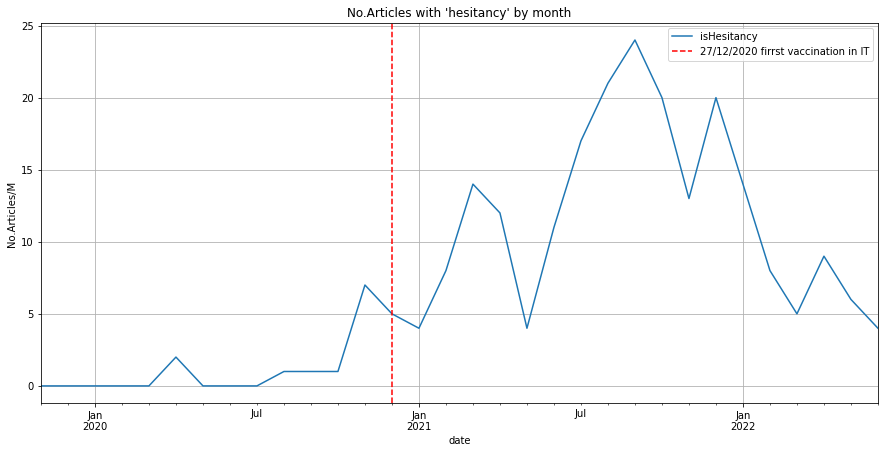

In [26]:
it = df4[df4.country == 'italy']

deltaT = 'M'
fig,ax = plt.subplots(figsize=(15,7))
it.groupby(it.date.dt.to_period(deltaT)).isHesitancy.sum().plot(ax=ax,)
ax.grid()
ax.set_title("No.Articles with 'hesitancy' by month")
ax.set_ylabel('No.Articles/{}'.format(deltaT))
ax.axvline('2020-12-27',color='red',linestyle='--', label ='27/12/2020 firrst vaccination in IT')
ax.legend()

/home/rba/Projects/cultural-analytics/venv_culturalanalytics/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/home/rba/Projects/cultural-analytics/venv_culturalanalytics/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/home/rba/Projects/cultural-analytics/venv_culturalanalytics/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/home/rba/Projects/cultural-analytics/venv_culturalanalytics/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/home/rba/Projects/cultural-analytics/venv_culturalanaly

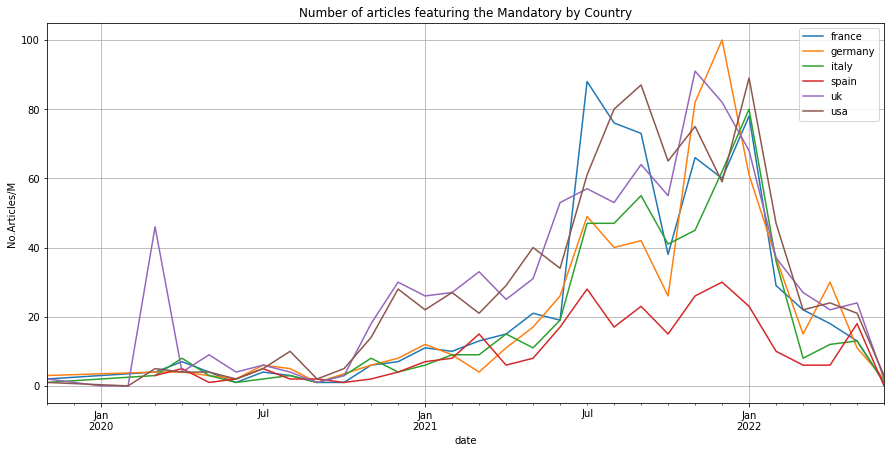

In [24]:
it = df4[df4.country.astype(str).str.contains('')]

deltaT = 'M'
fig,ax = plt.subplots(figsize=(15,7))

grp = it[-it.country.isna() & (it.country.isin(['italy','uk','usa','france','germany','spain','france']))].groupby('country')
for i,g in grp:
    g.groupby(g.date.dt.to_period(deltaT)).isMandatory.sum().plot(ax=ax, label=i)
ax.grid()
ax.set_ylabel('No.Articles/{}'.format(deltaT))
ax.set_title('Number of articles featuring the Mandatory by Country')
ax.legend()